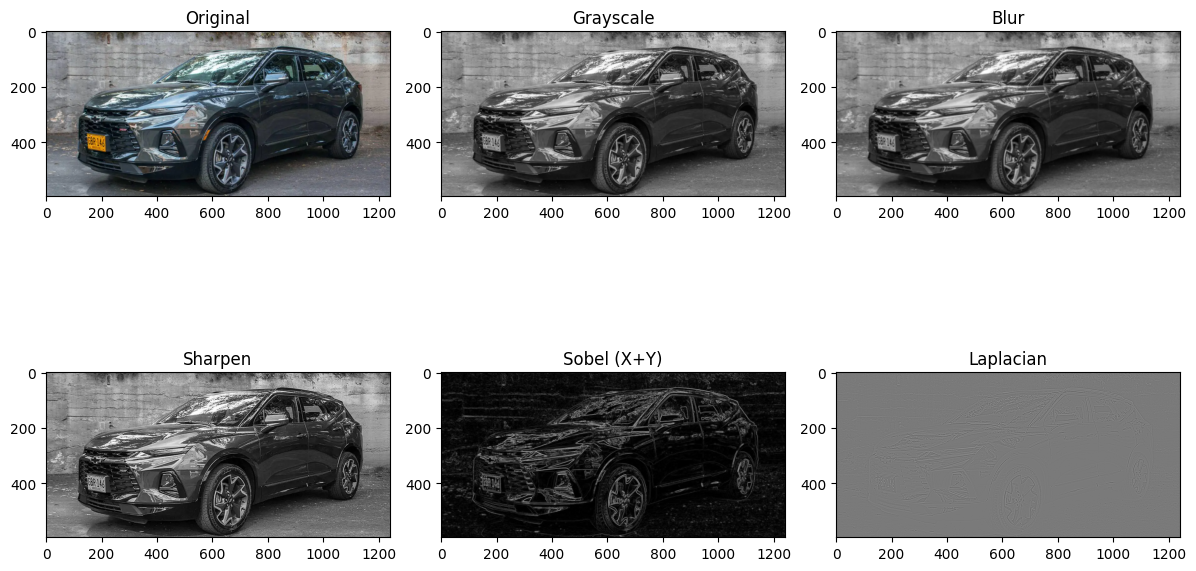

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imageio

img_color = cv2.imread('Imagen.png')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
sharpen_kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpen = cv2.filter2D(img_gray, -1, sharpen_kernel)

sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(2, 3, 2), plt.imshow(img_gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(2, 3, 3), plt.imshow(blur, cmap='gray'), plt.title('Blur')
plt.subplot(2, 3, 4), plt.imshow(sharpen, cmap='gray'), plt.title('Sharpen')
plt.subplot(2, 3, 5), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel (X+Y)')
plt.subplot(2, 3, 6), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.tight_layout()
plt.savefig('comparacion.png')
plt.show()

imageio.mimsave('resultados.gif', [img_gray, blur, sharpen, sobel_combined.astype(np.uint8), laplacian.astype(np.uint8)], fps=1)